<a href="https://colab.research.google.com/github/kartikparlikar/AlmaBetter-Airbnb_Capstone_project/blob/main/Copy_of_airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
# **INTRODUCTION**


Airbnb is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostel beds, or hotel rooms.

Airbnb is a big platform operating in 191 different countries. 

There are currently over 4+ million Airbnb hosts worldwide and 6+ million listings on the platform. There are over 100,000 cities worldwide that have Airbnb listings in them.


# **About Dataset**

Problem Statements

Features description

Data Exploration

Data Cleaning

Hosts and neighbourhood groups

Price distribution across neighbourhoods

Popular neighbourhood by reviews

Preferred room type

Conclusion



# **Problem Statements**





     
# With the help of exploratory data analysis techniques', we will try to answer the following problem statements:

What can we learn about different hosts and areas?

What can we learn from predictions( prices, reviews, etc.)

Which hosts are busiest

Which room type is preferred in most popular neighbourhood?


# **FIRST WE HAVE IMPORTED THE IMPORTANT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **THEN WE HAVE IMPORTED THE DATA AND CHECK ITS SIZE.**

In [ ]:
df = pd.read_csv('/content/Airbnb NYC 2019.csv')
df.shape

(48895, 16)

The dataset consist of 48895 observations (rows) and 16 features (columns).


# **THE DATA IS SHOWING BELOW.**

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Cheaking the first five rows of the dataset from unstanding for data column

# **WE STUDIED THE DATA TO KNOW ITS COLOUMN .**

**id:** Listing ID

**name:** Room Title 

**host_id**: ID of Host 


**host_name:** Name of Host

**neighbourhood_group:** Group Of Area

**neighbourhood:** Area's name

**latitude**: Latitude of listing 

**longitude** : Longitude of listing 

**room_type** :Type of the offered property 

**price**: Price per night in USD 

**minimum_nights**: Minimum number of nights Stay

**number_of_reviews**: Total number of reviews that listing 

**last_review**: Last rent date of the listing 

**reviews_per_month**: Total number of reviews divided by the number of months that the listing is active

**calculated_host_listings_count**: Amount of listing per host 

**availability_365**: Number of days per year the listing is active


In [ ]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **WE FOUND THE MISSING VALUES FROM DATA**

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The columns like number_of_reviews and reviews_per_month have largest number of null values.

The columns like name and host_name contain fewer number of null values.


# **WE HAVE FILLED MISSING VALUE (AS PER COLOUMN TYPE)**

In [ ]:
df["reviews_per_month"].fillna(0,inplace=True)
df["last_review"].fillna(0,inplace=True)
df['host_name'].fillna("other",inplace=True)
df['name'].fillna("other",inplace=True)


# **WE FIND THE UNIQUE VALUES_COUNTS FROM DATA COLOUMN**


In [ ]:
len(df['neighbourhood'].unique())

221

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
len(df['neighbourhood_group'].unique())

5

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
len(df['room_type'].unique())

3



---

# **so here we have :-**


1.   "neighbourhood" contains **221** unique values.
2.  "neighbourhood_group" contains **5**  unique values. There are five neighbourhood groups.
3. "room_type" contains **3** unique values. There are three types of rooms.






---



# **After checking "neighbourhood_group" and "neighborhood",  we came to know in which area we have got the maximum number of bookings.**

In [ ]:
counts_neighbourhood_group = df.groupby(['neighbourhood_group'])['neighbourhood'].count().reset_index()
counts_neighbourhood_group 

,neighbourhood_group,neighbourhood
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


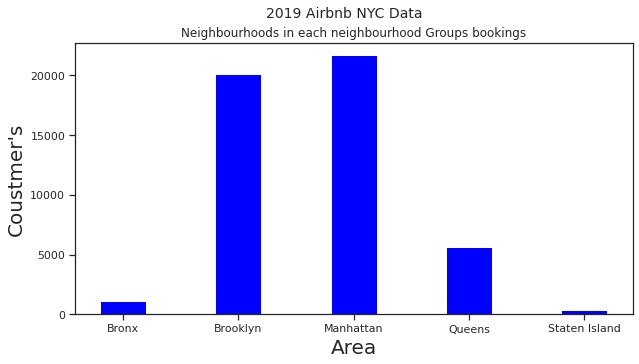

In [ ]:
Area = counts_neighbourhood_group['neighbourhood_group']
Coustmer  = counts_neighbourhood_group['neighbourhood']

fig = plt.figure(figsize = (10, 5))
plt.bar(Area,Coustmer, color ='blue',width = 0.4)
 
plt.xlabel("Area",size= 20)
plt.ylabel("Coustmer's",size= 20)
plt.title('Neighbourhoods in each neighbourhood Groups bookings')
plt.suptitle('2019 Airbnb NYC Data', fontsize= 14)
plt.show()


After analysing bookings by area group and area, we found out that we have most Bookings coming from Manhattan and Brooklyn. Because Manhattan is the most densely populated of New York City’s 5 boroughs.


It is observed that the Manhattan has highest number of listings of 21661 which
is 44.3% of total listings done on Airbnb.

 Brooklyn has 2nd highest number of  listings of 20104 which is 41.13% of the total listings.

Queens comes in 3rd place with 5666 listings whereas Bronx and Staten Island have least number of listings.












# **9. Here we analyzed on the basis of the review**

In [ ]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews 

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


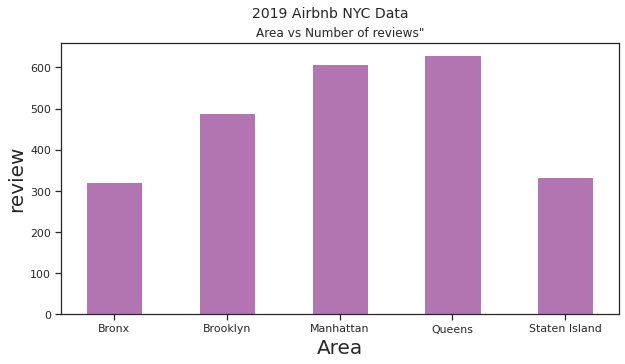

In [ ]:
Area = areas_reviews['neighbourhood_group']
review  = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))


plt.bar(Area,review, color =(0.5,0.1,0.5,0.6),width = 0.5)
 
plt.xlabel("Area",size= 20,)
plt.ylabel("review",size= 20)
plt.title('Area vs Number of reviews"')
plt.suptitle('2019 Airbnb NYC Data', fontsize= 14)
plt.show()

Then we analyse number of bookings according to review and Area.


The number of reviews feature in the dataset represent the customers who have given the reviews to a particular property they have stayed in.

> Looking at the bar graph, Queens  has 26.45% of total reviews which is a maximum share.



>   Manhattan has 2nd highest number of reviews constituting 25.53%.





>  Bronx has 13.50% of total reviews.




In [ ]:
price_area = df.groupby(['price'])['neighbourhood_group'].max().reset_index()
price_area.head(5)

,price,neighbourhood_group
0,0,Manhattan
1,10,Queens
2,11,Queens
3,12,Queens
4,13,Staten Island


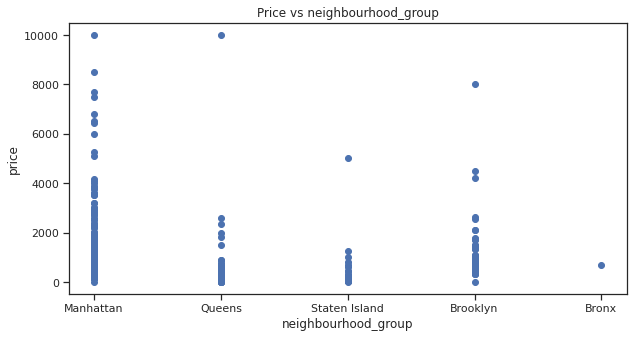

In [ ]:
area = price_area['price']
price = price_area['neighbourhood_group']

fig = plt.figure(figsize = (10, 5))
 
plt.scatter(price,area)
 
plt.xlabel("neighbourhood_group")
plt.ylabel("price")
plt.title("Price vs neighbourhood_group")
plt.show()

#10. From the Analysis we get to know that most people prefer to stay in place where price is less than 4000 USD.

> Here we have analyzed the price keeping in mind the neighborhood_group
>From the Analysis we get to know that most people prefer to stay in place where price is less than 4000 USD.
>So you can see this chart and find out that everywhere people book the lowest price.



# **room type & nights**


In [ ]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


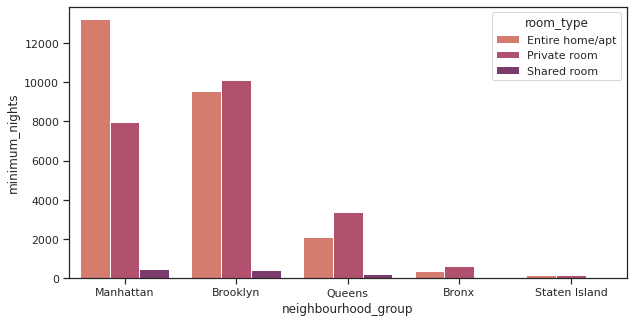

In [ ]:
sns.set_theme(style='ticks',color_codes = True)
plt.figure(figsize=(10,5))
sns.barplot(x = 'neighbourhood_group',y = 'minimum_nights', data= traffic_areas, hue='room_type',palette="flare")
plt.xlabel('neighbourhood_group')
plt.ylabel('minimum_nights')
plt.show()

###11.Here we have analyzed the room type according to all our locations
> From the Above Analysis We can Say that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.
.

booking from host

In [ ]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


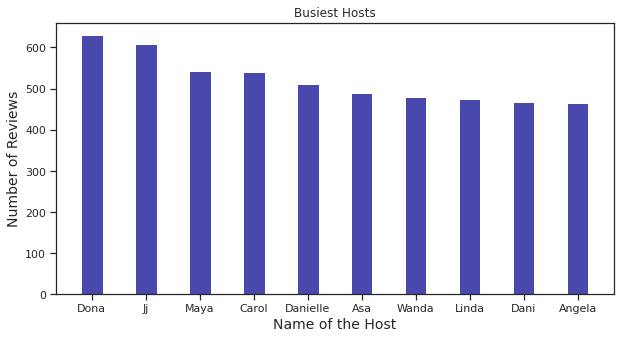

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(name, reviews, color =(0.1, 0.1, 0.6, 0.8),
        width = 0.4)
 
plt.xlabel("Name of the Host", size = 14)
plt.ylabel("Number of Reviews",size= 14)
plt.title("Busiest Hosts")
plt.show()

##12. Busiest hosts are: 
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

##Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.


>The adjacent bar plot shows the top 10 hosts with respect to number of reviews.

Among them, Dona has highest numbers of reviews and we can assume that Dona is the busiest host.

The top hosts have listed private room, entire home/apt.


.
.
.



# Conclusion:
1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers